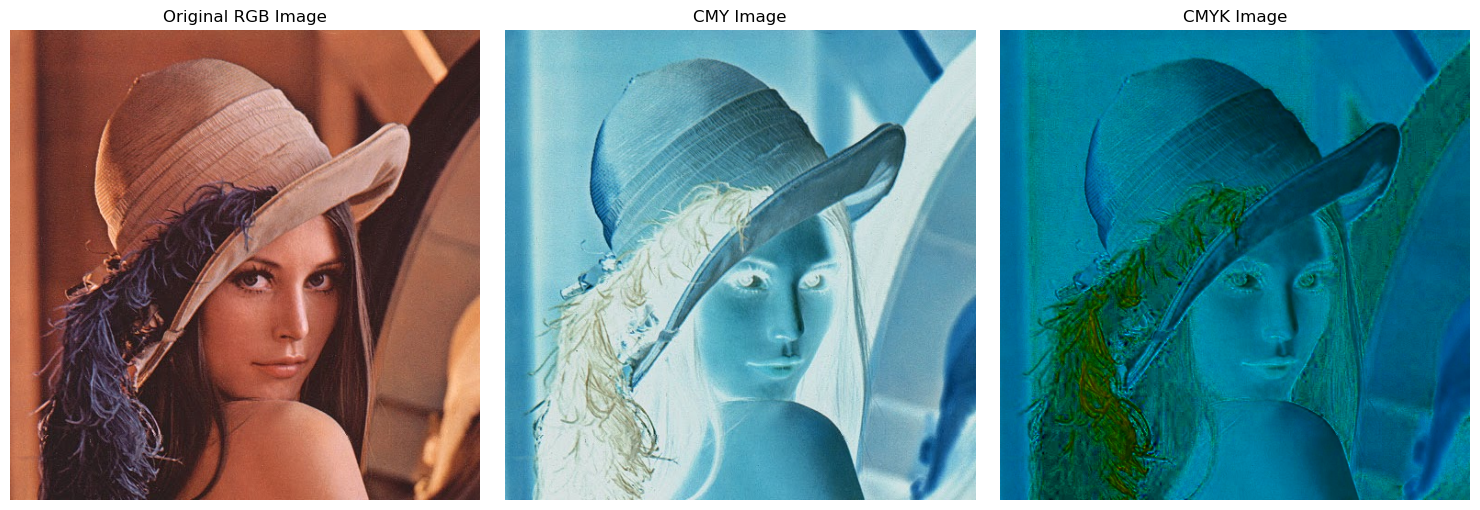

In [1]:
"""
Program Description:
This program demonstrates the transformation of an image from the RGB color model to the CMY and CMYK color models.
It visualizes the transformed images, enabling a comparison between the original RGB image and the transformed color representations. 

Key Concepts:
1. RGB Model:
   - Represents images using red, green, and blue channels.
   - Commonly used in digital displays and electronic media.

2. CMY Model:
   - A subtractive color model using cyan, magenta, and yellow, complementary to RGB.
   - Primarily used in printing devices that rely on subtractive color mixing (e.g., ink absorption).

3. CMYK Model:
   - An advanced subtractive color model extending CMY with black (Key) ink.
   - Widely used in professional printing to produce rich blacks and improve print quality.

4. Conversion vs. Transformation:
   - **Color Conversion**: Changes the color model (e.g., RGB to CMY) while maintaining the visual appearance of the image.
   - **Color Transformation**: Alters the image's color characteristics to suit specific purposes, such as enhancing contrast for printing (e.g., RGB to CMYK).
   - This program focuses on transformations designed for practical use cases like printing.

5. Transformation Process:
   - Converts an image from RGB to CMY and CMYK color spaces.
   - For CMYK, includes adjustments to utilize black ink effectively for better depth and contrast.
   - Displays the original and transformed images for comparison, enhancing understanding of color models.

Applications:
1. **Printing Technologies**:
   - Transforms RGB images into CMY or CMYK models for use in inkjet, laser, and offset printing.
   
2. **Graphic Design**:
   - Converts images into printable formats, ensuring accurate color reproduction on various media.
   
3. **Education**:
   - Demonstrates additive (RGB) vs. subtractive (CMY, CMYK) color mixing with visual examples.

Learning Objectives:
- Understand how RGB, CMY, and CMYK color models differ and their real-world use cases.
- Learn to perform transformations between these models programmatically.
- Visualize the impact of color model changes for printing and design applications.
"""


import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the RGB to CMY transformation function
def rgb_to_cmy(rgb_image):
    """Convert RGB image to CMY color space."""
    cmy_image = 255 - rgb_image  # Subtract each RGB component from 255
    return cmy_image

# Define the RGB to CMYK transformation function
def rgb_to_cmyk(rgb_image):
    """Convert RGB image to CMYK color space."""
    cmy_image = rgb_to_cmy(rgb_image)
    
    # Normalize the CMY values to [0, 1]
    cmy_norm = cmy_image / 255.0
    
    # Calculate the Key (K) channel
    K = np.min(cmy_norm, axis=-1)
    
    # Calculate Cyan, Magenta, Yellow channels based on K
    C = (cmy_norm[..., 0] - K) / (1 - K + 1e-10)  # Avoid division by zero
    M = (cmy_norm[..., 1] - K) / (1 - K + 1e-10)
    Y = (cmy_norm[..., 2] - K) / (1 - K + 1e-10)
    
    # Stack CMYK channels
    cmyk_image = np.stack((C, M, Y, K), axis=-1)
    return cmyk_image

# Load the RGB image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Replace with your image path
rgb_image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Convert RGB to CMY
cmy_image = rgb_to_cmy(rgb_image)

# Convert RGB to CMYK
cmyk_image = rgb_to_cmyk(rgb_image)

# =========================================
# Visualization using Matplotlib
# =========================================

# Titles for display
titles = [
    "Original RGB Image", "CMY Image",
    "CMYK Image"
]

# Prepare images for display
images = [
    rgb_image,
    cmy_image,  # CMY Image
    (cmyk_image[..., :3] * 255).astype(np.uint8)  # CMYK Image (Ignoring K for now)
]

# Plot images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, title, img in zip(axes, titles, images):
    if len(img.shape) == 2:  # Grayscale images
        ax.imshow(img, cmap='gray')
    else:  # RGB images
        ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()
